In [1]:
import argparse
import os
import json
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import uproot3
from matplotlib.offsetbox import AnchoredText
from util import make_dirs

Welcome to JupyROOT 6.12/07


/cvmfs/cms.cern.ch/slc7_amd64_gcc700/lcg/root/6.12.07-gnimlf5/lib/ROOT.py:318: DeprecationWarning: Python 2 has reached EOL. mplhep is in a deprecated mode. Please switch to Python 3.
  return _orig_ihook( name, *args, **kwds )


In [2]:
year = "2016APV"
f = uproot3.open('fitDiagnosticsTest.root')
g = uproot3.open('signalregion.root')

In [3]:
def plotTF_ratio_onebin(in_ratio, h_ratio, region):
    fig, ax = plt.subplots(figsize=(6,6))
    
    color = 'blue'
    if 'res' in region:
        color = 'red'
        
    x = [0,1]
    center = in_ratio.GetBinContent(1)
    down = center - in_ratio.GetBinError(1)
    up = center + in_ratio.GetBinError(1)
    
    plt.fill_between(x, [down, down], [up, up],color=color,alpha=0.3)
    plt.plot(x,[center,center],color=color)
    
    plt.errorbar(x=[0.5],y=[h_ratio.GetBinContent(1)],yerr=[h_ratio.GetBinError(1)],marker='o',color='black')


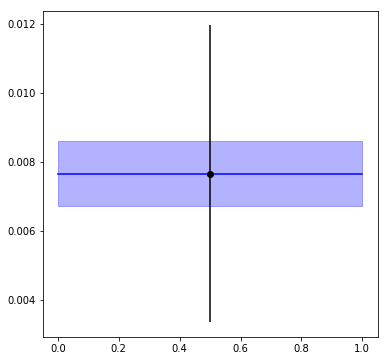

In [4]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
fail_qcd.Rebin(23)
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Rebin(23)
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('fail'))
hfail.Rebin(23)
hpass = signalregion.Get('vbf_{}_mjj1_QCD_nominal;1'.format('pass'))
hpass.Rebin(23)
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, region="VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

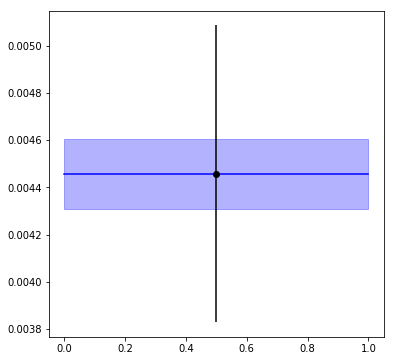

In [5]:
cat = 'vbfhi'

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
fail_qcd.Rebin(23)
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Rebin(23)
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('fail'))
hfail.Rebin(23)
hpass = signalregion.Get('vbf_{}_mjj2_QCD_nominal;1'.format('pass'))
hpass.Rebin(23)
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, region="VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{P/F}','QCD pass MC'],frameon=False)

5735.54248047
19.1808071136
('Missing hist ', 'shapes_fit_s/ptbin0vbflopass2016APV/VV')


Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different nu

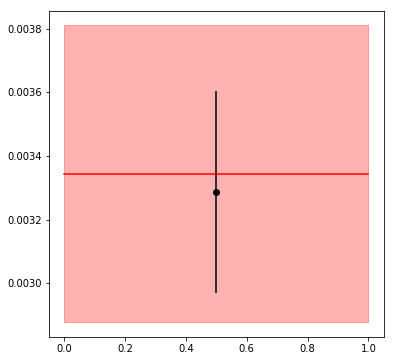

In [6]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []
ipt = 0

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
fail_qcd.Rebin(23)
print(fail_qcd.GetBinContent(1))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
pass_qcd.Rebin(23)
print(pass_qcd.GetBinContent(1))
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('fail'))
hfail.Rebin(23)
hpass = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('pass'))
hpass.Rebin(23)

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))    
        
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, region="F_{res} VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist ', 'shapes_fit_s/ptbin0vbfhipass2016APV/VV')


Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different nu

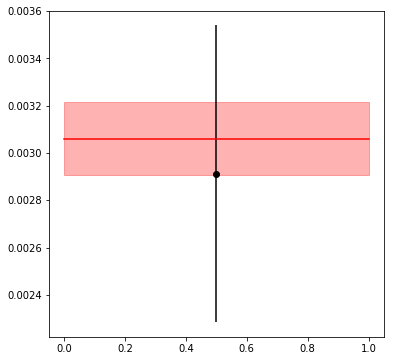

In [7]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
fail_qcd.Rebin(23)
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
pass_qcd.Rebin(23)
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('fail'))
hfail.Rebin(23)
hpass = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('pass'))
hpass.Rebin(23)

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b)) 
     
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, region="F_{res} VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist ', 'shapes_fit_s/ptbin0vbflopass2016APV/VV')


Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different nu

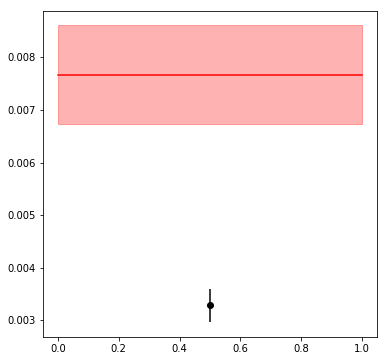

In [8]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
fail_qcd.Rebin(23)
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Rebin(23)
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('fail'))
hfail.Rebin(23)
hpass = signalregion.Get('vbf_{}_mjj1_data_nominal;1'.format('pass'))
hpass.Rebin(23)

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b)) 
     
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, region="F_{res} VBF mjj bin 1, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

('Missing hist ', 'shapes_fit_s/ptbin0vbfhipass2016APV/VV')


Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different number of bins - trying to use TH1::Merge
Info in <TH1D::Add>: Attempt to add histograms with different nu

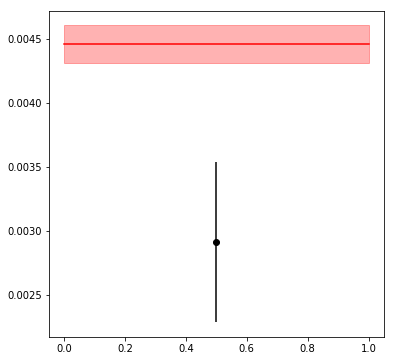

In [9]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
fail_qcd.Rebin(23)
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
pass_qcd.Rebin(23)
pass_qcd.Divide(fail_qcd)

signalregion = r.TFile.Open('signalregion.root','READ')
hfail = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('fail'))
hfail.Rebin(23)
hpass = signalregion.Get('vbf_{}_mjj2_data_nominal;1'.format('pass'))
hpass.Rebin(23)

backgrounds = ['Wjets','Zjets','Zjetsbb','EWKW','EWKZ','EWKZbb',
                   'ttbar','singlet','VV','ggF','VBF','ZH','WH','ttH']

for b in backgrounds:
    try:
        bfail = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year, b))
        bfail.Scale(-7)  
        hfail.Add(bfail)
    except:
        print("Missing hist", 'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'fail', year,b))
    try:
        bpass = fit.Get('shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b))
        bpass.Scale(-7)
        hpass.Add(bpass)
    except: 
        print("Missing hist ",'shapes_{}/ptbin{}{}{}{}/{}'.format('fit_s', ipt, cat, 'pass', year, b)) 
     
hpass.Divide(hfail)

ax = plotTF_ratio_onebin(pass_qcd, hpass, region="F_{res} VBF mjj bin 2, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

In [10]:
def plot_fitMC(in_ratio, h_ratio, region):
    fig, ax = plt.subplots(figsize=(6,6))
    
    color = 'blue'
    if 'res' in region:
        color = 'red'
        
    x = [0,1]
    center = in_ratio.GetBinContent(1)
    down = center - in_ratio.GetBinError(1)
    up = center + in_ratio.GetBinError(1)
    
    plt.fill_between(x, [down, down], [up, up],color=color,alpha=0.3,label='fit err')
    plt.plot(x,[center,center],color=color,label='fit')
    
    plt.errorbar(x=[0.5],y=[h_ratio.GetBinContent(1)],yerr=[h_ratio.GetBinError(1)],marker='o',color='black',label='MC')
    plt.legend(frameon=False)


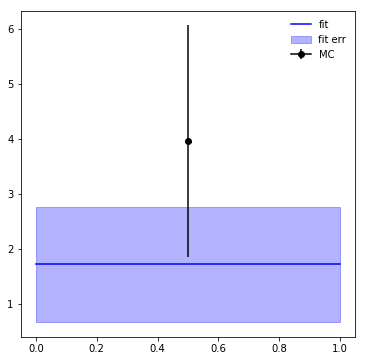

In [11]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
#pass_qcd.Divide(fail_qcd)

hfail = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
hpass = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))

#hpass.Divide(hfail)

ax = plot_fitMC(pass_qcd, hpass, region="VBF mjj bin 1 PASS, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

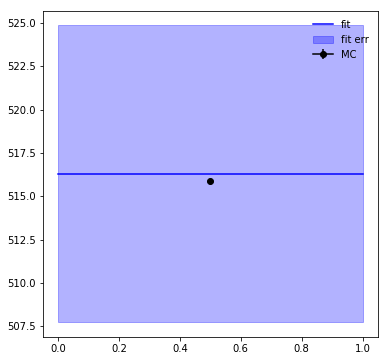

In [12]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
#pass_qcd.Divide(fail_qcd)

hfail = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
hpass = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))

#hpass.Divide(hfail)

ax = plot_fitMC(fail_qcd, hfail, region="VBF mjj bin 1 FAIL, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

(0, 0.015)

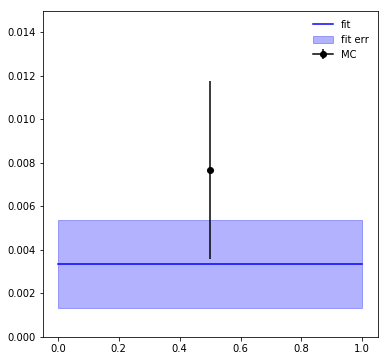

In [13]:
cat = 'vbflo'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

hfail = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
hpass = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
hpass.Divide(hfail)

ax = plot_fitMC(pass_qcd, hpass, region="VBF mjj bin 1 RATIO, "+year)
plt.ylim(0,0.015)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

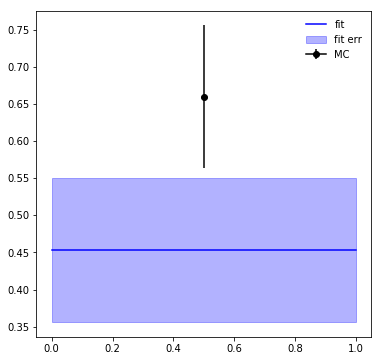

In [14]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
#pass_qcd.Divide(fail_qcd)

hfail = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
hpass = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))

#hpass.Divide(hfail)

ax = plot_fitMC(pass_qcd, hpass, region="VBF mjj bin 2 PASS, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

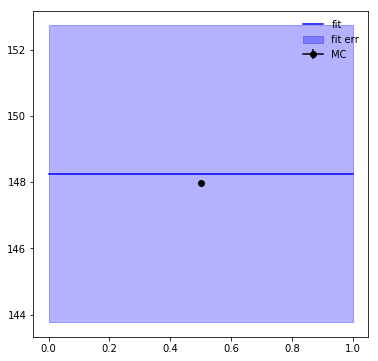

In [15]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
#pass_qcd.Divide(fail_qcd)

hfail = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
hpass = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))

#hpass.Divide(hfail)

ax = plot_fitMC(fail_qcd, hfail, region="VBF mjj bin 2 FAIL, "+year)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)

(0, 0.015)

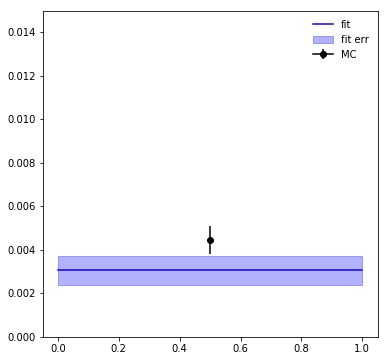

In [16]:
cat = 'vbfhi'
fail_qcd, pass_qcd = [], []
bins = []

fit = r.TFile.Open('fitDiagnosticsTest.root','READ')
fail_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'fail', year))
pass_qcd = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('fit_s', cat, 'pass', year))
pass_qcd.Divide(fail_qcd)

hfail = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'fail', year))
hpass = fit.Get('shapes_{}/ptbin0{}{}{}/qcd;1'.format('prefit', cat, 'pass', year))
hpass.Divide(hfail)

ax = plot_fitMC(pass_qcd, hpass, region="VBF mjj bin 2 RATIO, "+year)
plt.ylim(0,0.015)
#ax.legend(labels=['F_{res}','Data - non-QCD'],frameon=False)